In [1]:
# may require: pip install ipympl
%matplotlib widget

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression

In [ ]:
# Create some data
np.random.seed(628)
X = np.random.rand(330, 1)
y = 2 + 1.3 * X + np.random.rand(330, 1)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5.6))

# Plot the first two data points
sns.scatterplot(x=X[:2, 0], y=y[:2, 0], color=minor_color, ax=ax)

# Create a line object. This will be updated in the animation.
(line,) = ax.plot(X[:2], y[:2], "r-")

# Remove the axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)


# Function to generate data for the line of best fit
def update(num):
    # Add the next point to the plot
    ax.scatter(X[num], y[num], c="gray")

    # Fit a line of best fit through all points up to the current one
    model = LinearRegression()
    model.fit(X[: num + 1], y[: num + 1])
    y_line = model.predict(X[: num + 1])

    # Update the line data
    line.set_data(X[: num + 1], y_line)

    return (line,)


# Create an animation with a delay of 200 milliseconds between frames
ani = FuncAnimation(
    fig,
    update,
    frames=range(2, len(X)),
    blit=True,
    interval=200,
    repeat=3,
)

# Save the animation as a GIF
ani.save("../images/animation.gif", writer="pillow")

plt.show()

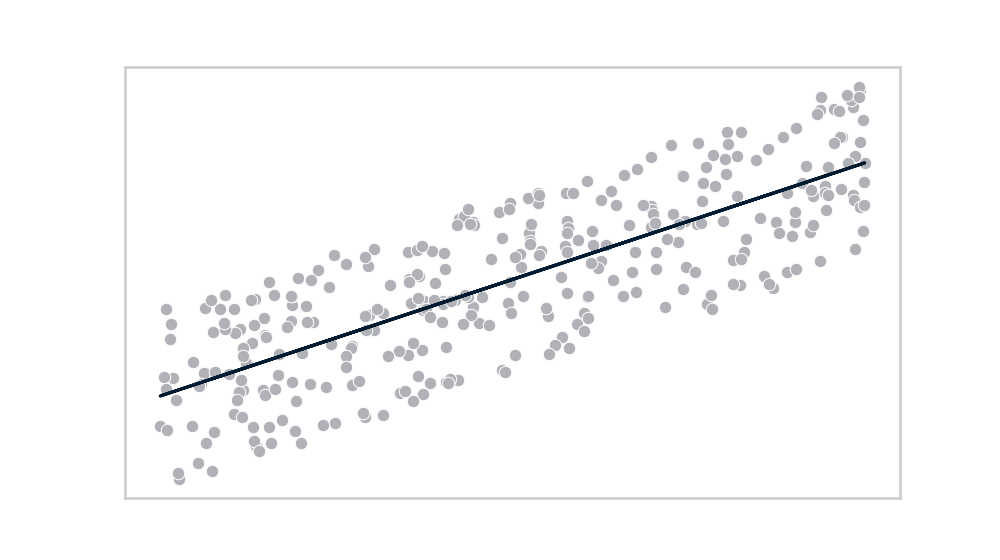

In [11]:
# Set the style of Seaborn
# sns.set_style("whitegrid")
sns.set_context("talk")

# Define the colors
acc_color = "#001b30"
minor_color = "#b0b2b8"
highlight_color = "#254928"
color3 = "#76a8d9"

# Create some data
np.random.seed(628)
X = np.random.rand(330, 1)
y = 2 + 1.3 * X + np.random.rand(330, 1)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5.6))

# Plot the first two data points
sns.scatterplot(x=X[:2].flatten(), y=y[:2].flatten(), color=minor_color, ax=ax)

# Create a line object. This will be updated in the animation.
(line,) = ax.plot(X[:2], y[:2], color=acc_color)

# Remove the axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# ax.spines["left"].set_visible(False)


# Function to generate data for the line of best fit
def update(num):
    if num < len(X) and num < len(y):
        # Add the next point to the plot
        sns.scatterplot(x=[X[num, 0]], y=[y[num, 0]], color=minor_color, ax=ax)

        # Fit a line of best fit through all points up to the current one
        model = LinearRegression()
        model.fit(X[: num + 1], y[: num + 1])
        y_line = model.predict(X[: num + 1])

        # Update the line data
        line.set_data(X[: num + 1], y_line)

        return (line,)


# Create an animation with a delay of 200 milliseconds between frames
ani = FuncAnimation(
    fig,
    update,
    frames=range(2, len(X)),
    blit=True,
    interval=200,
    repeat=3,
)

# Save the animation as a GIF
ani.save("../images/animation.gif", writer="pillow")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression

# Create some data
np.random.seed(628)
X = np.random.rand(330, 1)
y = 2 + 1.3 * X + np.random.rand(330, 1)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the first data point
(point,) = ax.plot(X[0], y[0], "bo")

# Create a line object. This will be updated in the animation.
(line,) = ax.plot(X[:2], y[:2], "r-")


# Function to generate data for the line of best fit
def update(num):
    # Add the next point to the plot
    point.set_data(X[num], y[num])
    # Update the line to go through all points up to the current one
    line.set_data(X[: num + 1].flatten(), y[: num + 1].flatten())
    # update axes limit
    ax.set_xlim(np.min(X[: num + 1]), np.max(X[: num + 1]))
    ax.set_ylim(np.min(y[: num + 1]), np.max(y[: num + 1]))
    return line, point


# Create an animation with a delay of 200 milliseconds between frames
ani = FuncAnimation(fig, update, frames=range(1, len(X)), blit=True, interval=200)

# Stop the animation after 5 seconds
plt.pause(5)
ani.event_source.stop()

# Display the plot
plt.show()